In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/udbhav-96/delhi-house-price-prediction/main/Delhi_v2.csv")

In [5]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [6]:
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns.")

There are 7738 rows and 18 columns.


In [56]:
df.isnull().sum()

Unnamed: 0          0
price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Status              0
neworold            0
type_of_building    0
desc                0
dtype: int64

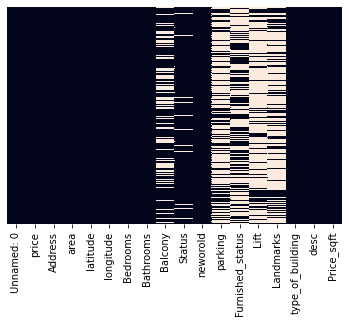

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [31]:
df.drop('Balcony',axis=1,inplace=True) 

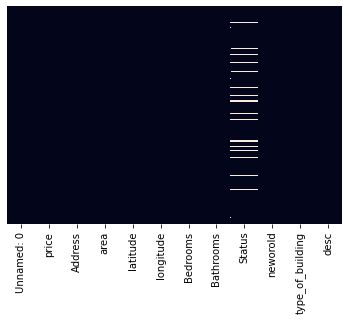

In [32]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

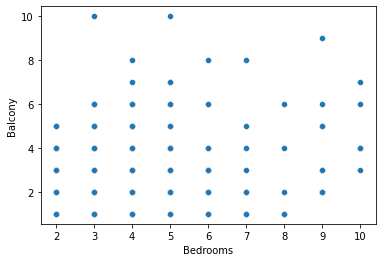

In [30]:
sns.scatterplot(x=df.Bedrooms,y=df.Balcony)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


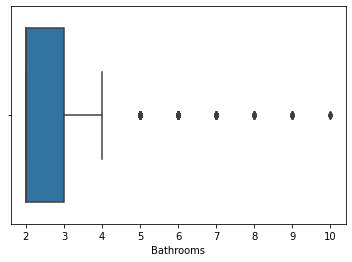

In [25]:
sns.boxplot(df["Bathrooms"])

In [55]:
df["Bathrooms"].value_counts()

2.0    5051
3.0    1907
4.0     551
5.0     138
6.0      44
7.0      21
8.0      12
9.0      10
Name: Bathrooms, dtype: int64

In [29]:
df[df['Bathrooms']>=10]

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,type_of_building,desc


In [28]:
df.drop([151,2207, 2805, 6865],inplace=True)

In [33]:
df.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms
count,7734.000000,7.734000e+03,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,3868.945565,8.313327e+06,1408.420222,28.552127,77.273572,2.705069,2.497285
std,2233.717709,7.210644e+06,713.617088,0.107424,0.180588,0.865018,0.850331
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000
25%,1934.250000,4.200000e+06,990.000000,28.455659,77.078590,2.000000,2.000000
50%,3869.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000
75%,5802.750000,9.500000e+06,1650.000000,28.642618,77.421054,3.000000,3.000000
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,9.000000


In [37]:
df['Status'] = df['Status'].map({'Ready to Move': 1, 'Under Construction': 0})

In [40]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,desc
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,0.0,New Property,Flat,\n\n\n Welcome ...
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,1.0,New Property,Flat,\n\n\n Mapsko M...
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,1.0,New Property,Flat,\n\n\n This pro...
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,0.0,New Property,Flat,\n\n\n AIG Roya...
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,1.0,Resale,Flat,\n\n\n The prop...


In [39]:
df.Status.fillna(0,inplace=True)

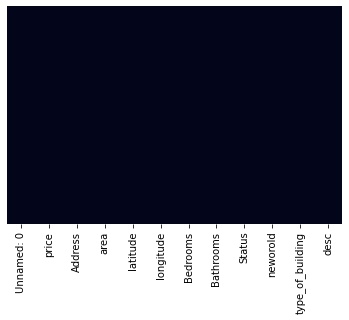

In [54]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [42]:
df.dtypes

Unnamed: 0            int64
price               float64
Address              object
area                float64
latitude            float64
longitude           float64
Bedrooms            float64
Bathrooms           float64
Status              float64
neworold             object
type_of_building     object
desc                 object
dtype: object

In [43]:
df['neworold'] = df['neworold'].map({'New Property': 1, 'Resale': 0})
df['type_of_building'] = df['type_of_building'].map({'Individual House': 1, 'Flat': 0})

In [44]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,desc
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,0.0,1,0,\n\n\n Welcome ...
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,1.0,1,0,\n\n\n Mapsko M...
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,1.0,1,0,\n\n\n This pro...
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,0.0,1,0,\n\n\n AIG Roya...
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,1.0,0,0,\n\n\n The prop...


In [46]:
df.dtypes

Unnamed: 0            int64
price               float64
Address              object
area                float64
latitude            float64
longitude           float64
Bedrooms            float64
Bathrooms           float64
Status              float64
neworold              int64
type_of_building      int64
desc                 object
dtype: object

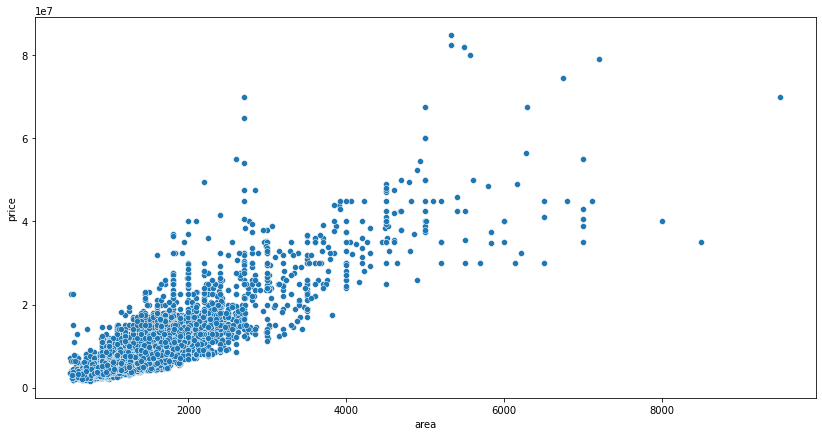

In [53]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.area,y=df.price)

In [66]:
from google.colab import files
df.to_csv('Delhi_for_model.csv') 
files.download('Delhi_for_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section